In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print "TensorFlow Version {}".format(tf.__version__)

TensorFlow Version 1.4.0


In [3]:
import os
import glob
from scipy.ndimage import imread
from sklearn.model_selection import train_test_split
def extract_all_images():
    working_dir = "/Users/madhvikannan/Downloads/CSCI-599-Text-to-Image-Synthesis/dataset/mnist"
    file_list = []
    for root, dirs, files in os.walk(working_dir):
        
        for filename in files:
            if filename.endswith('.jpg'):
                file_list.append(root + "/" + filename) 
    X_data=[]
    X_data_train=[]
    X_data_eval=[]
    X_data_test=[]
    for myfile in file_list:
        image=imread(myfile)
        X_data.append(image)
    X_data=np.asarray(X_data)
    label_list=get_label_list()
    X_data_shuffle, label_list_shuffle=X_data.reshape(60000,1,28,28), label_list
    X_train, X_test, labels_train, labels_test=train_test_split(X_data_shuffle, label_list_shuffle,test_size=0.2, random_state=42)
    X_train, X_val, labels_train, labels_val=train_test_split(X_train, labels_train,test_size=0.2, random_state=42)
    
    X_data_train=X_train.reshape(X_train.shape[0], 1, 28, 28).transpose(
        0, 2, 3, 1).astype("uint8")
    X_data_eval=X_val.reshape(X_val.shape[0], 1, 28, 28).transpose(
        0, 2, 3, 1).astype("uint8")
    X_data_test=X_test.reshape(X_test.shape[0], 1, 28, 28).transpose(
        0, 2, 3, 1).astype("uint8")
       
    print('X_data_train shape:', np.array(X_data_train).shape)
    print('X_data_eval shape:', np.array(X_data_eval).shape)
    print('X_data_test shape:', np.array(X_data_test).shape)
    print labels_train.shape
    print labels_val.shape
    print labels_test.shape
    return X_data_train, labels_train, X_data_eval, labels_val, X_data_test, labels_test
def get_label_list():
    working_dir1 = "/Users/madhvikannan/Downloads/CSCI-599-Text-to-Image-Synthesis/dataset/mnist"
    working_dir=os.listdir(working_dir1)
    count=0
    label_list=[]
    #label_list_new=[]
    for i in range(100):
        j=os.listdir(os.path.join(working_dir1,working_dir[i]))
        for myfile in j:
            label_list.append((count))
        count=count+1
    label_list=np.asarray(label_list)
   
    return label_list
 

def load_train_and_test_data():
    
    
        print "yes"
        X_data=[]
        X_data_train=[]
        X_data_eval=[]
        X_data_test=[]
        files=glob.glob('/Users/madhvikannan/Downloads/CSCI-599-Text-to-Image-Synthesis/dataset/output1/*.jpg')
        for myfile in files:
             #image=cv2.imread(myfile)
             #gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image=imread(myfile)
            X_data.append(image)
        
        X_data_train=X_data[0:15]
        X_data_eval=X_data[15:20]
        X_data_test=X_data[20:30]
        X_data=np.asarray(X_data)
        
        X_data_train=np.asarray(X_data_train)
        X_data_eval=np.asarray(X_data_eval)
        X_data_test=np.asarray(X_data_test)
        X_data_train=X_data_train.reshape(15, 1, 28, 28).transpose(
        0, 2, 3, 1).astype("uint8")
        X_data_eval=X_data_eval.reshape(5, 1, 28, 28).transpose(
        0, 2, 3, 1).astype("uint8")
        X_data_test=X_data_test.reshape(10, 1, 28, 28).transpose(
        0, 2, 3, 1).astype("uint8")
       
        print('X_data_train shape:', np.array(X_data_train).shape)
        print('X_data_eval shape:', np.array(X_data_eval).shape)
        print('X_data_test shape:', np.array(X_data_test).shape)
        
        path= '/Users/madhvikannan/Downloads/CSCI-599-Text-to-Image-Synthesis/dataset/input/sentences.txt'
        labels=[]
        labels_train=[]
        labels_eval=[]
        labels_test=[]
        with open(path,'r') as f:
            lines=f.readlines()
        for line in lines:
            words=line.split()
            labels.append(int(words[4]))
        labels=np.asarray(labels)
        labels_train=labels[0:15]
        labels_eval=labels[15:20]
        labels_test=labels[20:30]
        labels_train=np.asarray(labels_train)
        labels_eval=np.asarray(labels_eval)
        labels_test=np.asarray(labels_test)
        print ('Train labels shape:', labels_train.shape)
        print ('Eval labels shape:', labels_eval.shape)
        print ('Test labels shape:', labels_test.shape)
        
        return X_data_train, labels_train,X_data_eval, labels_eval, X_data_test, labels_test
X_train ,label_train,X_val, label_eval, X_test, label_test = extract_all_images()
num_training=X_train.shape[0]
num_validation=X_val.shape[0]
num_test=X_test.shape[0]

('X_data_train shape:', (38400, 28, 28, 1))
('X_data_eval shape:', (9600, 28, 28, 1))
('X_data_test shape:', (12000, 28, 28, 1))
(38400,)
(9600,)
(12000,)


In [4]:
# Define max pooling and conv layers
def conv2d(input, kernel_size, stride, num_filter):
    stride_shape = [1, stride, stride, 1]
    
    filter_shape = [kernel_size, kernel_size, input.get_shape()[3], num_filter]

    W = tf.get_variable('w', filter_shape, tf.float32, tf.random_normal_initializer(0.0, 0.02))
    b = tf.get_variable('b', [1, 1, 1, num_filter], initializer=tf.constant_initializer(0.0))
    return tf.nn.conv2d(input, W, stride_shape, padding='SAME') + b

def max_pool(input, kernel_size, stride):
    ksize = [1, kernel_size, kernel_size, 1]
    strides = [1, stride, stride, 1]
    return tf.nn.max_pool(input, ksize=ksize, strides=strides, padding='SAME')

def fully_connected(input, ip_size,op_size):
    #return tf.layers.dense(input,op_size)
    filter_shape=[ip_size,op_size]
    W = tf.get_variable('w', filter_shape, tf.float32, tf.random_normal_initializer(0.0, 0.02))
    b = tf.get_variable('b', [op_size], initializer=tf.constant_initializer(0.0))
    return tf.matmul(input,W)+b


In [5]:
class BaseModel(object):
    def __init__(self):
        self.num_epoch = 20
        self.batch_size = 128
        self.log_step = 50
        self._build_model()

    def _model(self):
        print('-' * 5 + '  Sample model  ' + '-' * 5)

        print('input layer: ' + str(self.X.get_shape()))
        
        with tf.variable_scope('conv1'):
            self.conv1 = conv2d(self.X, 7, 1, 32)
            self.relu1 = tf.nn.relu(self.conv1)
            self.pool1 = max_pool(self.relu1, 3, 2)            
            print('conv1 layer: ' + str(self.pool1.get_shape()))

        with tf.variable_scope('conv2'):
           
            self.conv2 = conv2d(self.pool1,5,1,64)
            self.relu2 = tf.nn.relu(self.conv2)
            self.pool2 = max_pool(self.relu2,3,2)           
            print('conv2 layer: ' + str(self.pool2.get_shape()))
        
        with tf.variable_scope('conv3'):
            self.conv3 = conv2d(self.pool2,5,1,32)
            self.relu3 = tf.nn.relu(self.conv3)
            self.pool3 = max_pool(self.relu3,3,2)           
            print('conv3 layer: ' + str(self.pool3.get_shape()))

        
        
        self.flat = tf.contrib.layers.flatten(self.pool3)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################      
        
        print('flat layer: ' + str(self.flat.get_shape()))

        with tf.variable_scope('fc3'):
            #############################################################################
            # TODO: Complete the following functions                                    #
            #############################################################################
            self.fc3 = fully_connected(self.flat, 512,256)
            self.relu3 = tf.nn.relu(self.fc3)
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            print('fc3 layer: ' + str(self.relu3.get_shape()))

        with tf.variable_scope('fc4'):
            #############################################################################
            # TODO: Complete the following functions                                    #
            #############################################################################
            self.fc4 = fully_connected(self.fc3,256,100)           
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            print('fc4 layer: ' + str(self.fc4.get_shape()))
        
        # Return the last layer
        return self.fc4

    def _input_ops(self):
        # Placeholders
        self.X = tf.placeholder(tf.float32, [None, 28, 28, 1])
        self.Y = tf.placeholder(tf.int64, [None])
        
        #############################################################################
        # TODO: You can add any placeholders                                        #
        #############################################################################
        self.is_train = None
        self.keep_prob = None
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

    def _build_optimizer(self):
        # Adam optimizer 'self.train_op' that minimizes 'self.loss_op'
        #############################################################################
        # TODO: Complete the following functions                                    #
        #############################################################################
        global_step=tf.Variable(0,trainable=False)
        learning_rate = tf.train.exponential_decay(5e-4,global_step,
                                           500, 0.96, staircase=True)
        self.train_op =  tf.train.AdamOptimizer(learning_rate).minimize(self.loss_op, global_step=global_step)      
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
        
    def _loss(self, labels, logits):
        # Softmax cross entropy loss 'self.loss_op'
        #############################################################################
        # TODO: Complete the following functions                                    #
        #############################################################################
        self.loss_op = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))      
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

    def _build_model(self):
        # Define input variables
        self._input_ops()

        # Convert Y to one-hot vector
        labels = tf.one_hot(self.Y, 100)

        # Build a model and get logits
        logits = self._model()

        # Compute loss
        self._loss(labels, logits)
        
        # Build optimizer
        self._build_optimizer()

        # Compute accuracy
        predict = tf.argmax(logits, 1)
        correct = tf.equal(predict, self.Y)
        self.accuracy_op = tf.reduce_mean(tf.cast(correct, tf.float32))
        
    def train(self, sess, X_train, Y_train, X_val, Y_val):
        sess.run(tf.global_variables_initializer())

        step = 0
        losses = []
        accuracies = []
        print('-' * 5 + '  Start training  ' + '-' * 5)
        for epoch in range(self.num_epoch):
            print('train for epoch %d' % epoch)
            for i in range(num_training // self.batch_size):
                X_ = X_train[i * self.batch_size:(i + 1) * self.batch_size][:]
                Y_ = Y_train[i * self.batch_size:(i + 1) * self.batch_size]

                #############################################################################
                # TODO: You can change feed data as you want                                #
                #############################################################################
                feed_dict = {self.X:X_, self.Y:Y_}         
                #############################################################################
                #                             END OF YOUR CODE                              #
                #############################################################################
                fetches = [self.train_op, self.loss_op, self.accuracy_op]

                _, loss, accuracy = sess.run(fetches, feed_dict=feed_dict)
                losses.append(loss)
                accuracies.append(accuracy)

                if step % self.log_step == 0:
                    print('iteration (%d): loss = %.3f, accuracy = %.3f' %
                        (step, loss, accuracy))
                step += 1

            #############################################################################
            # TODO: Plot training curves                                                #
            #############################################################################
            # Graph 1. X: epoch, Y: training loss
            total_batch=num_training//self.batch_size
            plt.subplot(2,1,1)
            plt.title('Training Loss')
            x_axis=range(total_batch)
            y_axis=losses[-total_batch:]
            plt.xlabel('Epochs')
            plt.plot(x_axis,y_axis)
            plt.show()
            # Graph 2. X: epoch, Y: training accuracy

            plt.subplot(2,1,1)
            plt.title('Training Accuracy')
            x_axis=range(total_batch)
            y_axis=accuracies[-total_batch:]
            plt.xlabel('Epochs')
            plt.plot(x_axis,y_axis)
            plt.show()
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

            # Print validation results
            print('validation for epoch %d' % epoch)
            val_accuracy = self.evaluate(sess, X_val, Y_val)
            print('-  epoch %d: validation accuracy = %.3f' % (epoch, val_accuracy))

    def evaluate(self, sess, X_eval, Y_eval):
        eval_accuracy = 0.0
        eval_iter = 0
        for i in range(X_eval.shape[0] // self.batch_size):
            X_ = X_eval[i * self.batch_size:(i + 1) * self.batch_size][:]
            Y_ = Y_eval[i * self.batch_size:(i + 1) * self.batch_size]
                        
            #############################################################################
            # TODO: You can change feed data as you want                                #
            #############################################################################
            feed_dict = {self.X: X_, self.Y: Y_}
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            accuracy = sess.run(self.accuracy_op, feed_dict=feed_dict)
            eval_accuracy += accuracy
            eval_iter += 1
        return eval_accuracy / eval_iter

-----  Sample model  -----
input layer: (?, 28, 28, 1)
conv1 layer: (?, 14, 14, 32)
conv2 layer: (?, 7, 7, 64)
conv3 layer: (?, 4, 4, 32)
flat layer: (?, 512)
fc3 layer: (?, 256)
fc4 layer: (?, 100)
-----  Start training  -----
train for epoch 0
iteration (0): loss = 649.541, accuracy = 0.008
iteration (50): loss = 221.359, accuracy = 0.430
iteration (100): loss = 108.760, accuracy = 0.812
iteration (150): loss = 53.291, accuracy = 0.852
iteration (200): loss = 36.081, accuracy = 0.906
iteration (250): loss = 27.648, accuracy = 0.938


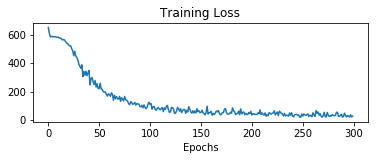

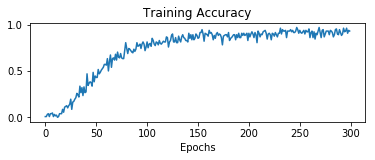

validation for epoch 0
-  epoch 0: validation accuracy = 0.914
train for epoch 1
iteration (300): loss = 27.295, accuracy = 0.930
iteration (350): loss = 16.569, accuracy = 0.961
iteration (400): loss = 32.420, accuracy = 0.922
iteration (450): loss = 32.410, accuracy = 0.930
iteration (500): loss = 10.010, accuracy = 0.984
iteration (550): loss = 22.675, accuracy = 0.938


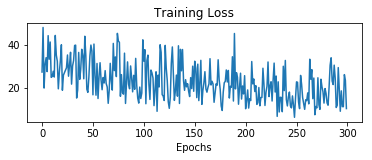

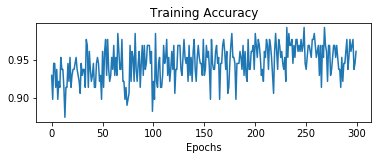

validation for epoch 1
-  epoch 1: validation accuracy = 0.946
train for epoch 2
iteration (600): loss = 9.778, accuracy = 0.992
iteration (650): loss = 13.348, accuracy = 0.953
iteration (700): loss = 13.736, accuracy = 0.953
iteration (750): loss = 30.692, accuracy = 0.938
iteration (800): loss = 8.810, accuracy = 0.984
iteration (850): loss = 13.171, accuracy = 0.961


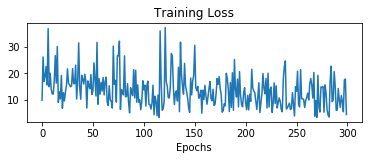

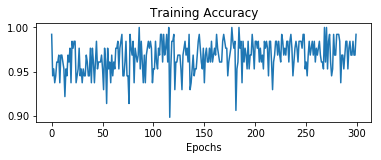

validation for epoch 2
-  epoch 2: validation accuracy = 0.957
train for epoch 3
iteration (900): loss = 8.055, accuracy = 0.984
iteration (950): loss = 9.548, accuracy = 0.969
iteration (1000): loss = 9.571, accuracy = 0.961
iteration (1050): loss = 14.512, accuracy = 0.969
iteration (1100): loss = 4.122, accuracy = 0.977
iteration (1150): loss = 6.829, accuracy = 0.984


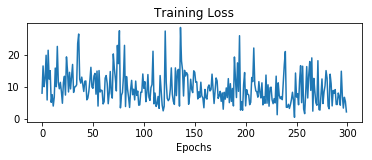

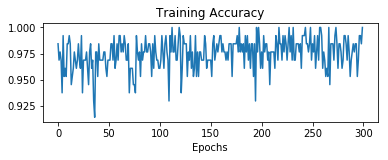

validation for epoch 3
-  epoch 3: validation accuracy = 0.958
train for epoch 4
iteration (1200): loss = 7.592, accuracy = 0.977
iteration (1250): loss = 4.024, accuracy = 0.984
iteration (1300): loss = 8.260, accuracy = 0.969
iteration (1350): loss = 13.887, accuracy = 0.961
iteration (1400): loss = 0.477, accuracy = 1.000
iteration (1450): loss = 4.900, accuracy = 0.977


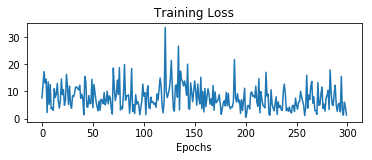

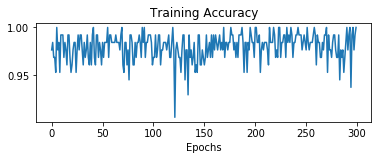

validation for epoch 4
-  epoch 4: validation accuracy = 0.967
train for epoch 5
iteration (1500): loss = 2.397, accuracy = 1.000
iteration (1550): loss = 11.145, accuracy = 0.977
iteration (1600): loss = 3.797, accuracy = 0.992
iteration (1650): loss = 11.116, accuracy = 0.969
iteration (1700): loss = 1.361, accuracy = 0.992
iteration (1750): loss = 5.673, accuracy = 0.977


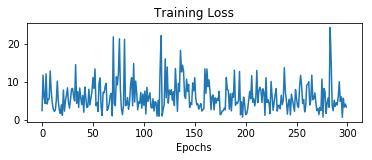

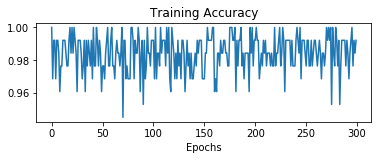

validation for epoch 5
-  epoch 5: validation accuracy = 0.965
train for epoch 6
iteration (1800): loss = 9.166, accuracy = 0.977
iteration (1850): loss = 2.073, accuracy = 0.992
iteration (1900): loss = 1.649, accuracy = 1.000
iteration (1950): loss = 1.189, accuracy = 1.000
iteration (2000): loss = 1.885, accuracy = 0.992
iteration (2050): loss = 8.091, accuracy = 0.992


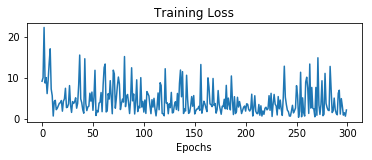

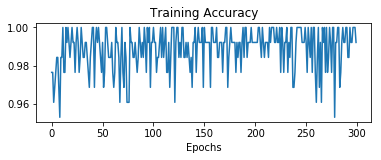

validation for epoch 6
-  epoch 6: validation accuracy = 0.974
train for epoch 7
iteration (2100): loss = 2.746, accuracy = 0.992
iteration (2150): loss = 0.853, accuracy = 1.000
iteration (2200): loss = 5.784, accuracy = 0.984
iteration (2250): loss = 5.262, accuracy = 0.977
iteration (2300): loss = 1.775, accuracy = 0.992
iteration (2350): loss = 1.042, accuracy = 0.992


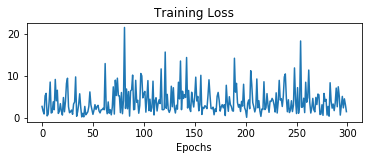

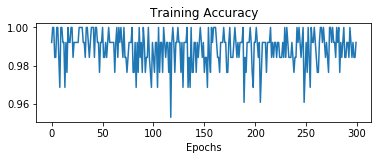

validation for epoch 7
-  epoch 7: validation accuracy = 0.975
train for epoch 8
iteration (2400): loss = 1.438, accuracy = 1.000
iteration (2450): loss = 1.952, accuracy = 0.992
iteration (2500): loss = 9.080, accuracy = 0.969
iteration (2550): loss = 1.634, accuracy = 0.992
iteration (2600): loss = 0.305, accuracy = 1.000
iteration (2650): loss = 1.934, accuracy = 1.000


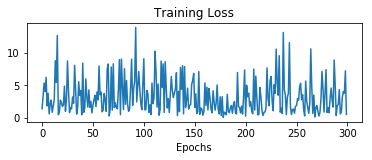

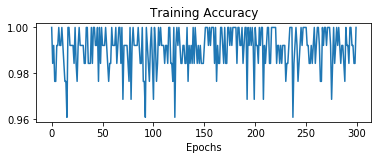

validation for epoch 8
-  epoch 8: validation accuracy = 0.979
train for epoch 9
iteration (2700): loss = 0.701, accuracy = 1.000
iteration (2750): loss = 0.534, accuracy = 1.000
iteration (2800): loss = 0.731, accuracy = 1.000
iteration (2850): loss = 0.998, accuracy = 1.000
iteration (2900): loss = 4.400, accuracy = 0.984
iteration (2950): loss = 2.219, accuracy = 1.000


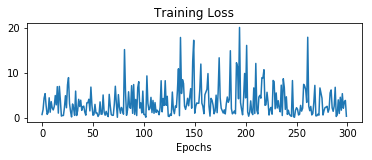

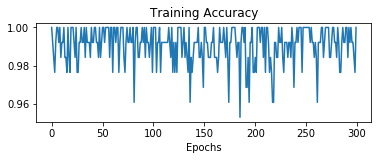

validation for epoch 9
-  epoch 9: validation accuracy = 0.977
train for epoch 10
iteration (3000): loss = 1.366, accuracy = 1.000
iteration (3050): loss = 4.076, accuracy = 0.984
iteration (3100): loss = 3.590, accuracy = 0.992
iteration (3150): loss = 5.310, accuracy = 0.992
iteration (3200): loss = 0.406, accuracy = 1.000
iteration (3250): loss = 1.976, accuracy = 0.992


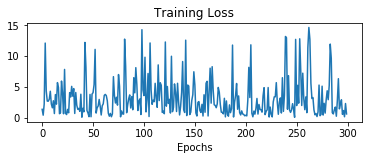

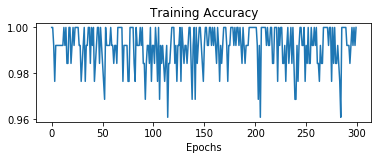

validation for epoch 10
-  epoch 10: validation accuracy = 0.973
train for epoch 11
iteration (3300): loss = 2.304, accuracy = 0.992
iteration (3350): loss = 2.240, accuracy = 0.992
iteration (3400): loss = 0.523, accuracy = 1.000
iteration (3450): loss = 0.833, accuracy = 1.000
iteration (3500): loss = 0.121, accuracy = 1.000
iteration (3550): loss = 1.290, accuracy = 0.992


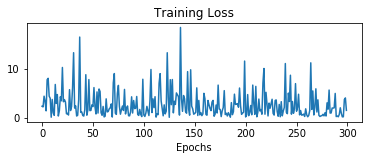

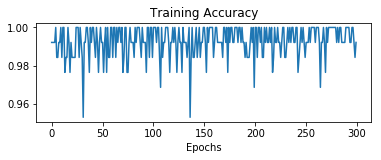

validation for epoch 11
-  epoch 11: validation accuracy = 0.976
train for epoch 12
iteration (3600): loss = 2.419, accuracy = 0.992
iteration (3650): loss = 0.375, accuracy = 1.000
iteration (3700): loss = 0.073, accuracy = 1.000
iteration (3750): loss = 1.888, accuracy = 1.000
iteration (3800): loss = 4.954, accuracy = 0.992
iteration (3850): loss = 1.359, accuracy = 0.992


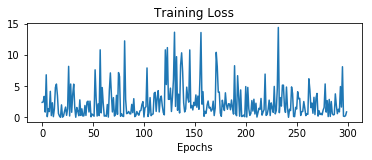

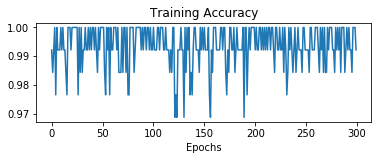

validation for epoch 12
-  epoch 12: validation accuracy = 0.983
train for epoch 13
iteration (3900): loss = 0.143, accuracy = 1.000
iteration (3950): loss = 2.791, accuracy = 0.984
iteration (4000): loss = 0.825, accuracy = 1.000
iteration (4050): loss = 0.511, accuracy = 1.000
iteration (4100): loss = 2.181, accuracy = 0.992
iteration (4150): loss = 1.266, accuracy = 1.000


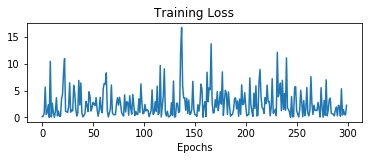

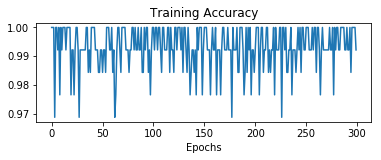

validation for epoch 13
-  epoch 13: validation accuracy = 0.976
train for epoch 14
iteration (4200): loss = 0.346, accuracy = 1.000
iteration (4250): loss = 0.025, accuracy = 1.000
iteration (4300): loss = 2.258, accuracy = 0.992
iteration (4350): loss = 0.479, accuracy = 1.000
iteration (4400): loss = 0.016, accuracy = 1.000
iteration (4450): loss = 1.506, accuracy = 0.992


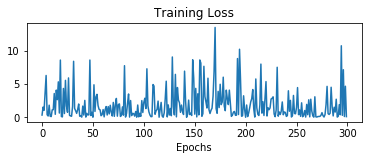

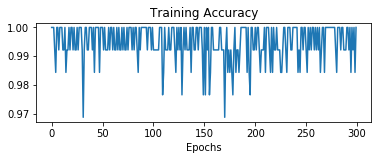

validation for epoch 14
-  epoch 14: validation accuracy = 0.978
train for epoch 15
iteration (4500): loss = 0.437, accuracy = 1.000
iteration (4550): loss = 0.159, accuracy = 1.000
iteration (4600): loss = 0.472, accuracy = 1.000
iteration (4650): loss = 1.144, accuracy = 0.992
iteration (4700): loss = 0.453, accuracy = 1.000
iteration (4750): loss = 0.203, accuracy = 1.000


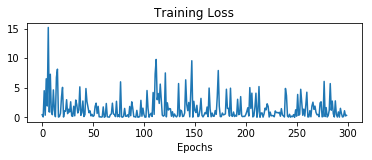

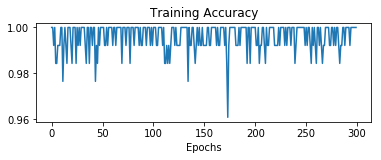

validation for epoch 15
-  epoch 15: validation accuracy = 0.980
train for epoch 16
iteration (4800): loss = 4.744, accuracy = 0.992
iteration (4850): loss = 0.108, accuracy = 1.000
iteration (4900): loss = 0.301, accuracy = 1.000
iteration (4950): loss = 2.605, accuracy = 0.984
iteration (5000): loss = 1.658, accuracy = 0.992
iteration (5050): loss = 4.740, accuracy = 0.984


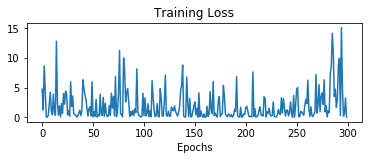

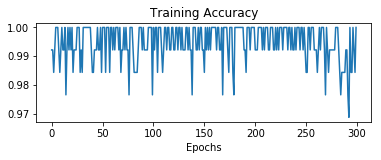

validation for epoch 16
-  epoch 16: validation accuracy = 0.974
train for epoch 17
iteration (5100): loss = 0.255, accuracy = 1.000
iteration (5150): loss = 0.148, accuracy = 1.000
iteration (5200): loss = 0.520, accuracy = 1.000
iteration (5250): loss = 2.246, accuracy = 0.992
iteration (5300): loss = 0.261, accuracy = 1.000
iteration (5350): loss = 1.981, accuracy = 0.992


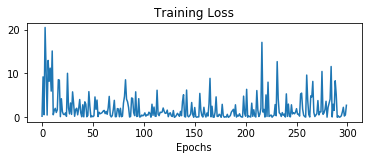

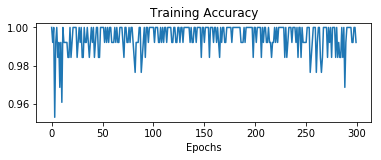

validation for epoch 17
-  epoch 17: validation accuracy = 0.974
train for epoch 18
iteration (5400): loss = 1.064, accuracy = 1.000
iteration (5450): loss = 0.091, accuracy = 1.000
iteration (5500): loss = 1.706, accuracy = 0.992
iteration (5550): loss = 0.072, accuracy = 1.000
iteration (5600): loss = 0.693, accuracy = 1.000
iteration (5650): loss = 5.942, accuracy = 0.984


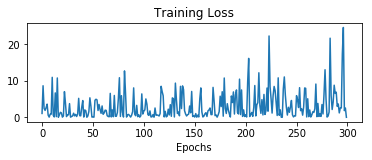

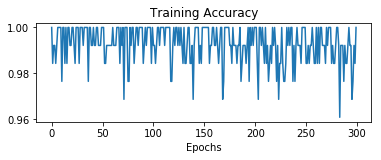

validation for epoch 18
-  epoch 18: validation accuracy = 0.978
train for epoch 19
iteration (5700): loss = 2.099, accuracy = 0.984
iteration (5750): loss = 9.118, accuracy = 0.984
iteration (5800): loss = 0.651, accuracy = 1.000
iteration (5850): loss = 1.779, accuracy = 0.992
iteration (5900): loss = 0.027, accuracy = 1.000
iteration (5950): loss = 0.042, accuracy = 1.000


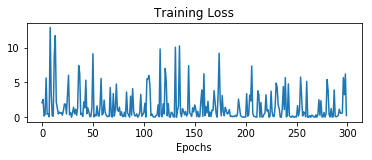

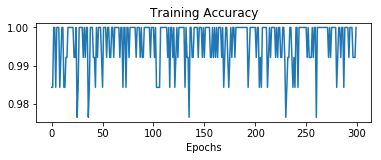

validation for epoch 19
-  epoch 19: validation accuracy = 0.982
***** test accuracy: 0.982


In [6]:
# Clear old computation graphs
tf.reset_default_graph()

# Train our sample model
with tf.Session() as sess:
    with tf.device('/cpu:0'):
        model = BaseModel()
        model.train(sess, X_train, label_train, X_val, label_eval)
       
        accuracy = model.evaluate(sess, X_test, label_test)
        print('***** test accuracy: %.3f' % accuracy)
        saver = tf.train.Saver()
        #model_path = saver.save(sess, "lib/tf_models/problem2/csci-599_sample.ckpt")
        #print("Model saved in %s" % model_path)

In [ ]:
model_path = saver.save(sess, "./MNIST-100.ckpt")
print("Model saved in %s" % model_path)